In [64]:
import pandas as pd 
import numpy as np
data=pd.read_csv('asymetrique.csv')
data

,index,Valeurs
0,0,0.795875
1,1,1.255931
2,2,0.923223
3,3,0.787201
4,4,0.551048
...,...,...
995,995,0.102782
996,996,0.723446
997,997,2.787289
998,998,0.259609


In [65]:
data=pd.DataFrame(data)
data

,index,Valeurs
0,0,0.795875
1,1,1.255931
2,2,0.923223
3,3,0.787201
4,4,0.551048
...,...,...
995,995,0.102782
996,996,0.723446
997,997,2.787289
998,998,0.259609


In [66]:
n= data.isnull().sum()
n

index        0
Valeurs    100
dtype: int64

In [67]:
a=(100*100)/1000
a

10.0

In [68]:
total_elements = data.size

# Calculer le nombre de NaN
total_nan = data.isna().sum().sum()

# Calculer la fréquence des NaN en pourcentage
nan_frequency = (total_nan / total_elements) * 100

print(f"La fréquence des valeurs NaN est : {nan_frequency:.2f}%")

La fréquence des valeurs NaN est : 5.00%


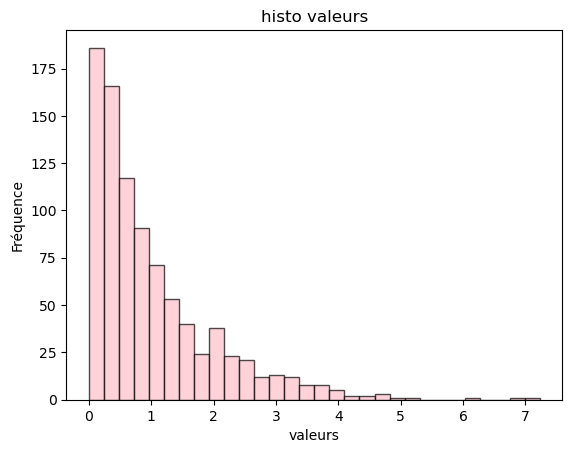

In [69]:
import matplotlib.pyplot as plt
plt.hist(data['Valeurs'], bins=30, edgecolor='black',color='pink', alpha=0.7)
plt.title('histo valeurs')
plt.xlabel("valeurs")
plt.ylabel("Fréquence")
plt.show()

In [62]:
# Fonction pour calculer l'asymétrie (skewness)
def calculate_skewness(data):
    data = [x for x in data if pd.notnull(x)]  # Filtrer les NaN
    n = len(data)

    if n == 0:  # Si aucune donnée valide, renvoyer None
        return None

    # Calcul de la moyenne
    mean = sum(data) / n

    # Calcul de la variance
    variance = sum((x - mean) ** 2 for x in data) / n
    std_dev = variance ** 0.5  # Écart-type

    if std_dev == 0:  # Pour éviter une division par zéro
        return 0

    # Calcul de l'asymétrie (skewness)
    skewness = (sum((x - mean) ** 3 for x in data) / n) / (std_dev ** 3)

    return skewness

skewness_value = calculate_skewness(data['valeurs'])

print(f"L'asymétrie des valeurs est : {skewness_value}")


L'asymétrie des valeurs est : 0.017719767154253527


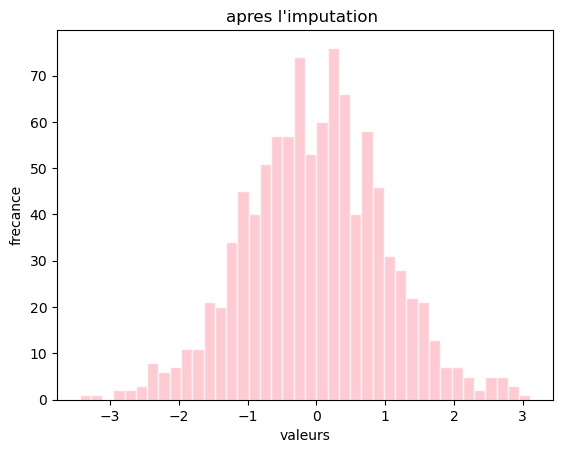

In [57]:
M = data['valeurs'].median()
# Remplacement des NaN par l'asymétrie
data['valeurs'].fillna(M, inplace=True)

# Affichage de l'histogramme après l'imputation
plt.hist(data['valeurs'],bins=40,edgecolor="white",color="lightpink",alpha=0.7)
plt.title("apres l'imputation ")
plt.xlabel("valeurs")
plt.ylabel("frecance")
plt.show()

KeyError: 'Valeurs'

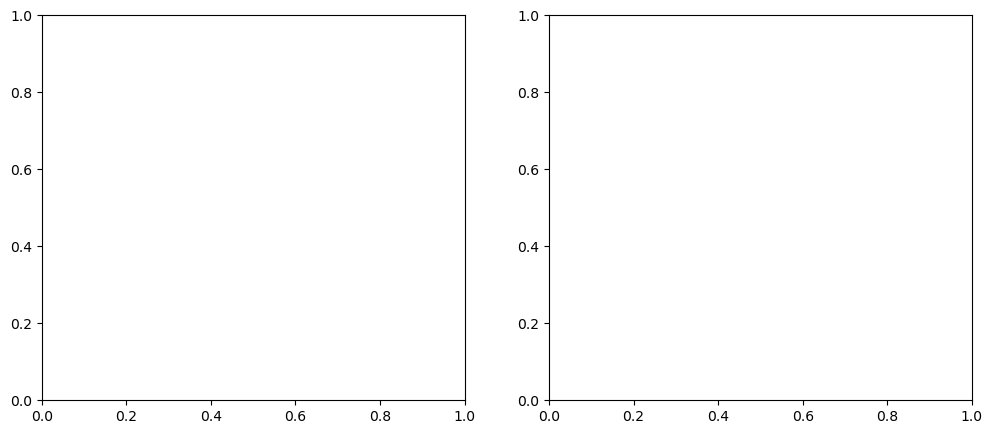

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#original
axes[0].hist(data['Valeurs'], bins=30, edgecolor='black',color='pink', alpha=0.7)
axes[0].set_title('histo valeurs')
axes[0].set_xlabel("valeurs")
axes[0].set_ylabel("Fréquence")

#apres l'imputation
axes[1].hist(data['valeurs'],bins=40,edgecolor="white",color="lightpink",alpha=0.7)
axes[1].set_title("apres l'imputation ")
axes[1].set_xlabel("valeurs")
axes[1].set_ylabel("frecance")
plt.tight_layout()
plt.show()